In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import pandas as pd
import os
import gc
import numpy as np

import os
import sys
import pandas as pd
import numpy as np
seed= 7
np.seed= seed
import gc
import importlib
import pickle
from pprint import pprint
import time


# visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style="whitegrid", font_scale= 1.5)
from IPython.display import display

# modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Neural Networks
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format('channels_last')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import concatenate



Using TensorFlow backend.


# Sentiment Analysis, IMDB Data

In [2]:
data= pd.read_csv( '/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
print(data.shape)
data.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


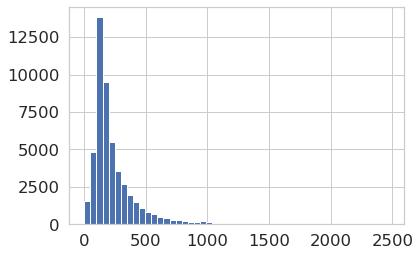

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: token_length, dtype: float64

In [3]:
data['token_length']= data['review'].apply(lambda x: len(x.split()) )
plt.hist( data['token_length'], bins= 50 )
plt.xlabel('')
plt.show()

data['token_length'].describe()

# train-test split

In [4]:
data['sentiment'].value_counts(normalize= True)

negative    0.5
positive    0.5
Name: sentiment, dtype: float64

In [5]:
data_train, data_test= train_test_split (data, test_size=0.2, random_state= seed, 
                                        shuffle= True, stratify= data['sentiment'])

X_train= data_train['review']
y_train= data_train['sentiment']
X_test= data_test['review']
y_test= data_test['sentiment']

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print()
print( 'distribution of sentiments in the train data: \n', 
              data_train['sentiment'].value_counts(normalize= True) )
print()
print( 'distribution of sentiments in the test data: \n',  
              data_test['sentiment'].value_counts(normalize= True) )

X_train shape:  (40000,)
X_test shape:  (10000,)

distribution of sentiments in the train data: 
 positive    0.5
negative    0.5
Name: sentiment, dtype: float64

distribution of sentiments in the test data: 
 positive    0.5
negative    0.5
Name: sentiment, dtype: float64


In [6]:
display(X_train.head(2))
display(X_test.head(2))
display(y_train.head(2))

37667    There were very few good moments in this film....
48751    Soylent Green is a classic. I have been waitin...
Name: review, dtype: object

25900    It is sad what they are letting into film fest...
36505    I find this movie very enjoyable. The plot is ...
Name: review, dtype: object

37667    negative
48751    positive
Name: sentiment, dtype: object

# preprocessing the text

In [7]:
from nltk.corpus import stopwords
import string

def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

X_train= X_train.apply(lambda row: clean_doc(row) )
X_test= X_test.apply(lambda row: clean_doc(row) )

y_train= y_train.apply( lambda x: 1 if x=='positive' else 0)
y_test= y_test.apply( lambda x: 1 if x=='positive' else 0)

In [8]:
display(X_train.head(2))

37667    [There, good, moments, film, Only, couple, cha...
48751    [Soylent, Green, classic, waiting, someone, re...
Name: review, dtype: object

In [9]:
X_train.iloc[0]

['There',
 'good',
 'moments',
 'film',
 'Only',
 'couple',
 'characters',
 'fleshed',
 'well',
 'There',
 'plot',
 'holes',
 'big',
 'enough',
 'drive',
 'truck',
 'The',
 'pace',
 'creeped',
 'along',
 'like',
 'old',
 'man',
 'There',
 'many',
 'moments',
 'film',
 'never',
 'came',
 'back',
 'like',
 'Coco',
 'stripping',
 'What',
 'happened',
 'How',
 'Garcis',
 'sister',
 'Is',
 'better',
 'What',
 'Leroy',
 'We',
 'learned',
 'absolutely',
 'nothing',
 'What',
 'electronic',
 'piano',
 'guy',
 'How',
 'rich',
 'girl',
 'got',
 'abortion',
 'What',
 'happened',
 'That',
 'interesting',
 'subplotbr',
 'br',
 'Overall',
 'good',
 'movie',
 'recommend',
 'another',
 'musical',
 'film',
 'LETS',
 'DO',
 'THE',
 'TIME',
 'WARP',
 'AGAIN']

**Why do we tokenize text data?**

Most NLP applications need an embedding layer. An embedding layer is usually put in the first layer, and its purpose is to learn meaningful representations of words. There are a variety of neural network architechture to learn these embeggings. The input of an embedding layer is a fixed number of words, and the output is their embeddings. The mechanism is explained by me ine one page. 

However, the layer cannot accept words as they are. In reality, we need to one-hot encode the words first. However, an equivalent way of one-hot encoding is integer encoding of words. Every word in the vocabulary gets a unique integer assigned to it. This process is sometimes called tokenization. The following function does so.

In [10]:
# fit a tokenizer
def create_tokenizer(lines):
    """
    returns an object for to tokenize words in each document of our dataset.
    lines is a list of lists. Each sublist in lines (representing one document) 
    is a list of words.
    
    Ex. 
    
    integer_encoded= create_tokenizer(lines).tests_to_sequences( texts )
    texts is a dataframe or series or list of elments where elements are lists of words
    
    """
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

We need to find out the maximum length of our documents. If you remember, our documents are now in form of a list of words. We need to know the maximum length because later on we'll have to pad shorter documents by as much as this maximum size.

In [11]:
# calculate the maximum document length
def max_length(lists):
    """
    lists is a list of lists
    It returns the maximum length of its elements
    """
    return max([len( l ) for l in lists])

max_length( X_train.tolist() )

1480

In [12]:
# encode a list of lines
def encode_text(tokenizer, lines, length):
    # integer encode
    encoded = tokenizer.texts_to_sequences(lines)
    # pad encoded sequences
    padded = pad_sequences(encoded, maxlen= length, padding= 'post')
    return padded

tokenizer= create_tokenizer( X_train.tolist() )
encoded_text= encode_text( tokenizer, X_train.tolist(),  max_length( X_train.tolist() ))

In [13]:
print(len(encoded_text))
print( len( encoded_text[0] ) )
encoded_text[1]

40000
1480


array([9065, 1339,  270, ...,    0,    0,    0], dtype=int32)

# Modelling

Here we fit a multi-channel CNN to predict sentiments from imdb reviews. 

In [14]:
# define the model
def define_model(length, vocab_size):
    # channel 1
    inputs1 = Input(shape=(length,))
    embedding1 = Embedding(vocab_size, 100)(inputs1)
    conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
    drop1 = Dropout(0.5)(conv1)
    pool1 = MaxPooling1D(pool_size=2)(drop1)
    flat1 = Flatten()(pool1)
    # channel 2
    inputs2 = Input(shape=(length,))
    embedding2 = Embedding(vocab_size, 100)(inputs2)
    conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
    drop2 = Dropout(0.5)(conv2)
    pool2 = MaxPooling1D(pool_size=2)(drop2)
    flat2 = Flatten()(pool2)
    # channel 3
    inputs3 = Input(shape=(length,))
    embedding3 = Embedding(vocab_size, 100)(inputs3)
    conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling1D(pool_size=2)(drop3)
    flat3 = Flatten()(pool3)
    # merge
    merged = concatenate([flat1, flat2, flat3])
    # interpretation
    dense1 = Dense(10, activation='relu')(merged)
    outputs = Dense(1, activation='sigmoid')(dense1)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs= outputs)
    # compile
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize
    print(model.summary())
    plot_model(model, show_shapes= True, to_file= 'multichannel.png')
    return model
########################################3
# calculate vocabulary size
vocab_size = len(tokenizer.word_index) + 1
length= max_length( X_train.tolist() )

# define model
model = define_model(length, vocab_size)
# fit model
model.fit([encoded_text,encoded_text,encoded_text], y_train.values, epochs=10, batch_size=1024)
# save the model
model.save('model.h5')

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1480)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1480)]       0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1480)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1480, 100)    15462100    input_1[0][0]                    
______________________________________________________________________________________________

In [15]:
2+2

4

In [16]:
max_length( X_test.tolist() )

1208

In [17]:
del(encoded_test_text)

NameError: name 'encoded_test_text' is not defined

In [18]:
encoded_text_test= encode_text( tokenizer, X_test.tolist(),  max_length( X_train.tolist() ))

In [19]:
from tensorflow.keras.models import load_model

model = load_model('model.h5')
# evaluate model on training dataset
#loss, acc = model.evaluate([encoded_text,encoded_text,encoded_text], y_train.values, verbose=1)
#print('Train Accuracy: %f' % (acc*100))
 
# evaluate model on test dataset dataset
loss, acc = model.evaluate([encoded_text_test,encoded_text_test,encoded_text_test], y_test.values, verbose=1)
print('Test Accuracy: %f' % (acc*100))

10000/10000 [==============================] - 22s 2ms/sample - loss: 0.4850 - accuracy: 0.8830
Test Accuracy: 88.300002
